In [4]:
# 필요한 패키지 설치
import math
from sklearn import preprocessing
import datetime
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.dpi'] = 150

- 한글 지원

In [5]:
import matplotlib.font_manager as fm

# 한글 폰트 지원
font_path = 'C:/Windows/Fonts/malgun.ttf'

# 폰트 이름 가져오기
font_name = fm.FontProperties(fname=font_path).get_name()

# 폰트 설정
plt.rc('font', family=font_name)

In [6]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/marian447/retail-store-sales-transactions
df = pd.read_csv("../resource/W3/scanner_data.csv")

# 데이터 샘플 확인
df.head()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88


In [7]:
df.describe(include='all')

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
count,131706.000000,131706,131706.000000,131706.000000,131706,131706,131706.000000,131706.000000
unique,NaN,363,NaN,NaN,187,5242,NaN,NaN
top,NaN,23/09/2016,NaN,NaN,N8U,UNJKW,NaN,NaN
freq,NaN,638,NaN,NaN,10913,2007,NaN,NaN
mean,65853.500000,NaN,12386.450367,32389.604187,NaN,NaN,1.485311,11.981524
std,38020.391614,NaN,6086.447552,18709.901238,NaN,NaN,3.872667,19.359699
min,1.000000,NaN,1.000000,1.000000,NaN,NaN,0.010000,0.020000
25%,32927.250000,NaN,7349.000000,16134.000000,NaN,NaN,1.000000,4.230000
50%,65853.500000,NaN,13496.000000,32620.000000,NaN,NaN,1.000000,6.920000
75%,98779.750000,NaN,17306.000000,48548.000000,NaN,NaN,1.000000,12.330000


In [8]:
# df['Date1'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
# df['Date1'] = df['Date'].astype('str')
df1 = df.head(1000)

In [9]:
df1.head()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88


In [10]:
grouped_df1 = df1.groupby('Date')
result_quant = grouped_df1['Quantity'].sum()
result_sales = grouped_df1['Sales_Amount'].sum()


In [11]:
result_quant.info()

<class 'pandas.core.series.Series'>
Index: 4 entries, 02/01/2016 to 05/01/2016
Series name: Quantity
Non-Null Count  Dtype  
--------------  -----  
4 non-null      float64
dtypes: float64(1)
memory usage: 64.0+ bytes


In [12]:
result_quant.values

array([264.67, 121.  , 530.  , 378.  ])

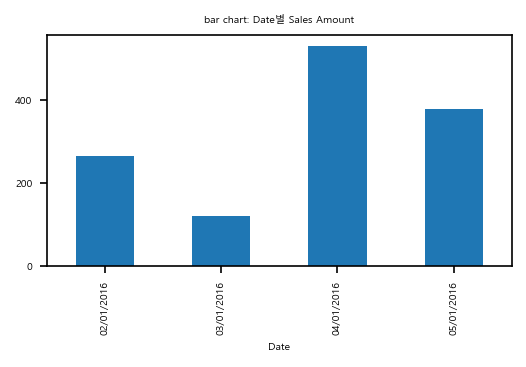

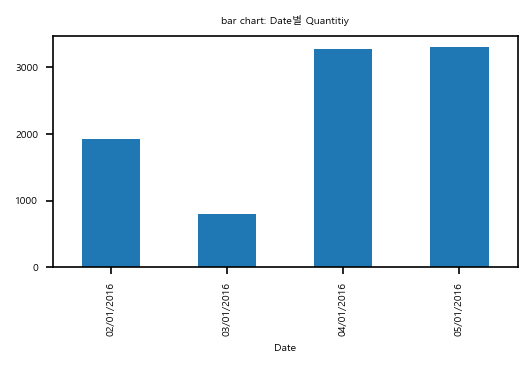

In [13]:
plt.figure(figsize=(4, 2))
result_quant.plot(kind='bar')
plt.title("bar chart: Date별 Sales Amount", fontsize=5)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.xlabel('Date', fontsize=5)

plt.figure(figsize=(4, 2))
result_sales.plot(kind='bar')
plt.title("bar chart: Date별 Quantitiy", fontsize=5)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.xlabel('Date', fontsize=5)

plt.show()

In [14]:
# 두 개의 변수 결합한 파생변수 생성

# 구매 상품당 가격 컬럼 생성
df['Unit_amount'] = df['Sales_Amount']/df['Quantity']

# 총 구매가격 컬럼 생성
df['All_amount'] = \
df[['Quantity', 'Sales_Amount']].apply(lambda series: series.prod(), axis=1)

df.tail()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Unit_amount,All_amount
131701,131702,04/07/2016,20203,32900,IEV,FO112,3.0,6.46,2.153333,19.38
131702,131703,04/07/2016,20203,32900,N8U,I36F2,1.0,4.50,4.500000,4.50
131703,131704,04/07/2016,20203,32900,U5F,4X8P4,1.0,5.19,5.190000,5.19
131704,131705,04/07/2016,20203,32900,0H2,ZVTO4,1.0,4.57,4.570000,4.57
131705,131706,04/07/2016,20203,32900,Q4N,QM9BP,1.0,13.68,13.680000,13.68


In [15]:
# 로그, 제곱근, 제곱 변환 파생변수 생성

# 방법1.Sales_Amount 컬럼 로그 적용 (+1)
df['Sales_Amount_log'] = preprocessing.scale(np.log(df['Sales_Amount']+1))

# 방법2.Sales_Amount 컬럼 로그 적용 (+1)
df['Sales_Amount_log2'] = df[['Sales_Amount']].apply(lambda x: np.log(x+1))    

# Sales_Amount 컬럼 제곱근 적용 (+1)
df['Sales_Amount_sqrt'] = np.sqrt(df['Sales_Amount']+1)

# Sales_Amount 컬럼 제곱 적용
df['Sales_Amount_pow'] = pow(df[['Sales_Amount']],2)

df.tail()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Unit_amount,All_amount,Sales_Amount_log,Sales_Amount_log2,Sales_Amount_sqrt,Sales_Amount_pow
131701,131702,04/07/2016,20203,32900,IEV,FO112,3.0,6.46,2.153333,19.38,-0.204581,2.009555,2.731300,41.7316
131702,131703,04/07/2016,20203,32900,N8U,I36F2,1.0,4.50,4.500000,4.50,-0.592329,1.704748,2.345208,20.2500
131703,131704,04/07/2016,20203,32900,U5F,4X8P4,1.0,5.19,5.190000,5.19,-0.441982,1.822935,2.487971,26.9361
131704,131705,04/07/2016,20203,32900,0H2,ZVTO4,1.0,4.57,4.570000,4.57,-0.576240,1.717395,2.360085,20.8849
131705,131706,04/07/2016,20203,32900,Q4N,QM9BP,1.0,13.68,13.680000,13.68,0.656548,2.686486,3.831449,187.1424


In [16]:
# 월 합계, 평균 구매금액 변수 생성

# date 컬럼 날짜형식 변환
# df['Date2']= pd.to_datetime(df['Date'], infer_datetime_format=True) 
df['Date2']= pd.to_datetime(df['Date'], format='%d/%m/%Y') 

# 연도 컬럼 생성
df['Year'] = df['Date2'].dt.year

# 월 컬럼 생성
df['Month'] = df['Date2'].dt.month

#연월별, 고객별 매출 합계, 평균 컬럼 생성
df_sm = df.groupby(['Year', 
                    'Month', 
                    'Customer_ID'])['Sales_Amount'].agg(['sum','mean']).reset_index()

# 기존 일별 테이블에 평균 테이블 조인
df2 = pd.merge(df, df_sm, how='left')

df2.head()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Unit_amount,All_amount,Sales_Amount_log,Sales_Amount_log2,Sales_Amount_sqrt,Sales_Amount_pow,Date2,Year,Month,sum,mean
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13,3.13,3.13,-0.956750,1.418277,2.032240,9.7969,2016-01-02,2016,1,27.01,6.752500
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46,5.46,5.46,-0.387670,1.865629,2.541653,29.8116,2016-01-02,2016,1,14.05,3.512500
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35,6.35,6.35,-0.223478,1.994700,2.711088,40.3225,2016-01-02,2016,1,135.16,7.113684
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59,5.59,5.59,-0.362325,1.885553,2.567100,31.2481,2016-01-02,2016,1,244.83,9.793200
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88,6.88,6.88,-0.134904,2.064328,2.807134,47.3344,2016-01-02,2016,1,6.88,6.880000


In [17]:
# 월 평균 구매금액 대비 일 별 구매금액 차이 변수 생성
df2['Sales_Amount_Diff'] = df2['mean'] - df2['Sales_Amount']

# 월 평균 구매금액 대비 일 별 구매금액 비율 변수 생성
df2['Sales_Amount_UD'] = df2['Sales_Amount'] / df2['mean']
    
# 월 총 구매금액 대비 일 별 구매금액 비율 변수 생성
df2['Sales_Amount_Rto'] = df2['Sales_Amount']/df2['sum']
    
df2.head()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Unit_amount,All_amount,...,Sales_Amount_sqrt,Sales_Amount_pow,Date2,Year,Month,sum,mean,Sales_Amount_Diff,Sales_Amount_UD,Sales_Amount_Rto
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13,3.13,3.13,...,2.032240,9.7969,2016-01-02,2016,1,27.01,6.752500,3.622500,0.463532,0.115883
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46,5.46,5.46,...,2.541653,29.8116,2016-01-02,2016,1,14.05,3.512500,-1.947500,1.554448,0.388612
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35,6.35,6.35,...,2.711088,40.3225,2016-01-02,2016,1,135.16,7.113684,0.763684,0.892646,0.046981
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59,5.59,5.59,...,2.567100,31.2481,2016-01-02,2016,1,244.83,9.793200,4.203200,0.570804,0.022832
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88,6.88,6.88,...,2.807134,47.3344,2016-01-02,2016,1,6.88,6.880000,0.000000,1.000000,1.000000


In [18]:
# 전 월 값 파생변수 생성

# 4주 뒤 시점 컬럼 생성
df2['Date2_1_m'] = df2['Date2'] + timedelta(weeks=4)

# # 4주 뒤 시점연도 컬럼 생성
df['Year_1_m'] = df2['Date2_1_m'].dt.year

# # 4주 뒤 시점월 컬럼 생성
df['Month_1_m'] = df2['Date2_1_m'].dt.month

# 4주 전 구매금액 연월별, 고객별 매출 평균 컬럼 생성
df_Mn_1 = df.groupby(['Year_1_m', 
                      'Month_1_m', 
                      'Customer_ID'])['Sales_Amount'].agg(['sum',
                                                           'mean']).reset_index()

# 조인을 위한 컬럼명 변경 
df_Mn_1.rename(columns={'Year_1_m':'Year', 
                        'Month_1_m':'Month', 
                        'sum':"sum_1_m", 
                        'mean':'mean_1_m'}, inplace=True)

df2 = pd.merge(df2, df_Mn_1, how='left')

df2.head()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Unit_amount,All_amount,...,Year,Month,sum,mean,Sales_Amount_Diff,Sales_Amount_UD,Sales_Amount_Rto,Date2_1_m,sum_1_m,mean_1_m
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13,3.13,3.13,...,2016,1,27.01,6.752500,3.622500,0.463532,0.115883,2016-01-30,3.13,3.13
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46,5.46,5.46,...,2016,1,14.05,3.512500,-1.947500,1.554448,0.388612,2016-01-30,5.46,5.46
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35,6.35,6.35,...,2016,1,135.16,7.113684,0.763684,0.892646,0.046981,2016-01-30,6.35,6.35
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59,5.59,5.59,...,2016,1,244.83,9.793200,4.203200,0.570804,0.022832,2016-01-30,5.59,5.59
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88,6.88,6.88,...,2016,1,6.88,6.880000,0.000000,1.000000,1.000000,2016-01-30,6.88,6.88


In [19]:
# 전 월과의 차이 파생변수 생성

# 전 월 대비 구매금액 평균 차이 변수 생성
df2['Mn_diff_1_mean'] = df2['mean'] - df2['mean_1_m']

# 전 월 대비 총 구매금액 차이 변수 생성
df2['Mn_diff_1_sum'] = df2['sum'] - df2['sum_1_m']

df2.head()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Unit_amount,All_amount,...,sum,mean,Sales_Amount_Diff,Sales_Amount_UD,Sales_Amount_Rto,Date2_1_m,sum_1_m,mean_1_m,Mn_diff_1_mean,Mn_diff_1_sum
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13,3.13,3.13,...,27.01,6.752500,3.622500,0.463532,0.115883,2016-01-30,3.13,3.13,3.622500,23.88
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46,5.46,5.46,...,14.05,3.512500,-1.947500,1.554448,0.388612,2016-01-30,5.46,5.46,-1.947500,8.59
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35,6.35,6.35,...,135.16,7.113684,0.763684,0.892646,0.046981,2016-01-30,6.35,6.35,0.763684,128.81
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59,5.59,5.59,...,244.83,9.793200,4.203200,0.570804,0.022832,2016-01-30,5.59,5.59,4.203200,239.24
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88,6.88,6.88,...,6.88,6.880000,0.000000,1.000000,1.000000,2016-01-30,6.88,6.88,0.000000,0.00
